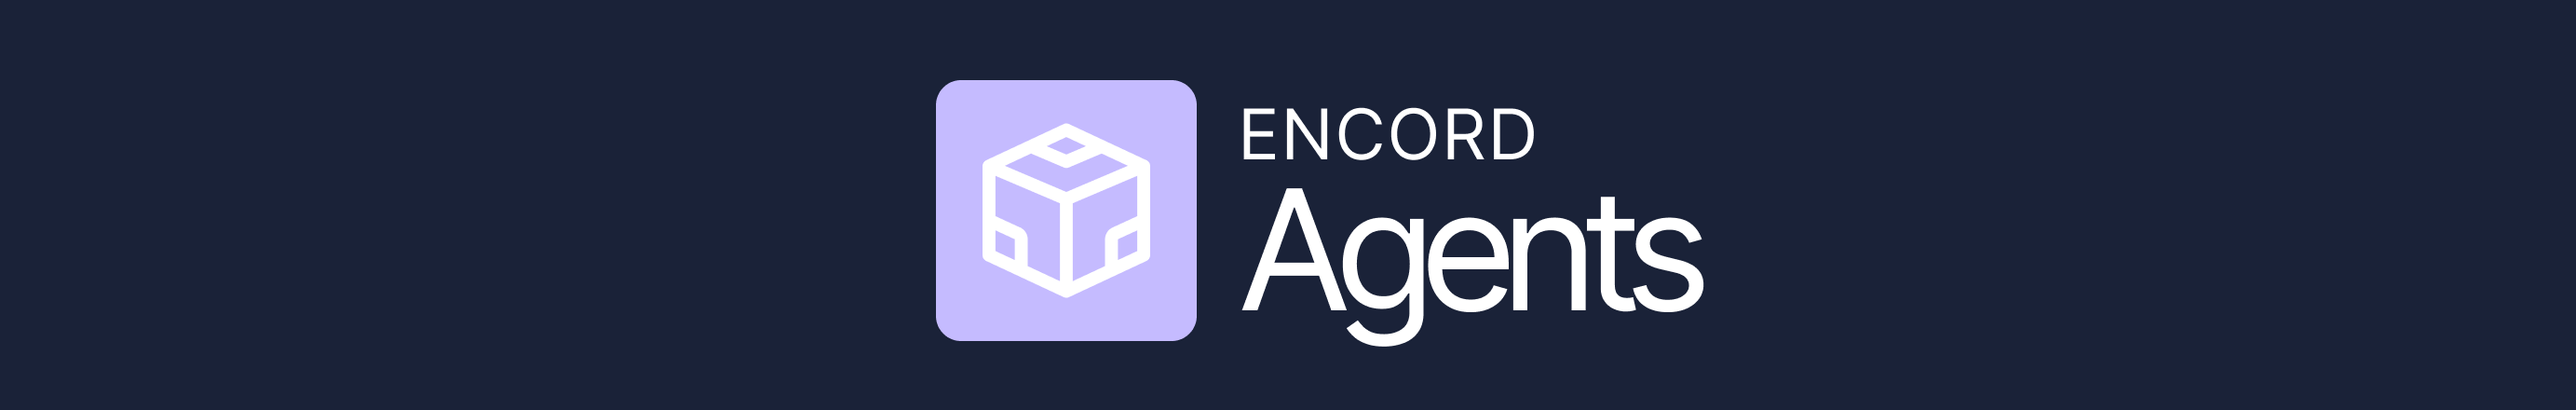


# Route based on previous annotator

This example demonstrates how to set up an agent to automatically route a task depending on which annotator it was annotated by. This allows for more complicated flows where you track the performance of an annotator and can conditionally route based on that.

### Example Workflow

This workflow allows for conditional routing of tasks, note the Agent stage follows the Annotate stage and has multiple pathways. To use this example effectively, ensure your workflow matches or closely resembles the one shown. Without the previous stage, we will have no such field and without pathways, we have no option for dynamic routing

[📖 Here](https://docs.encord.com/platform-documentation/Annotate/annotate-projects/annotate-workflows-and-templates#creating-workflows) is the documentation for creating a workflow with Encord.

The code in this notebook is for the **annotator name routing** agent.

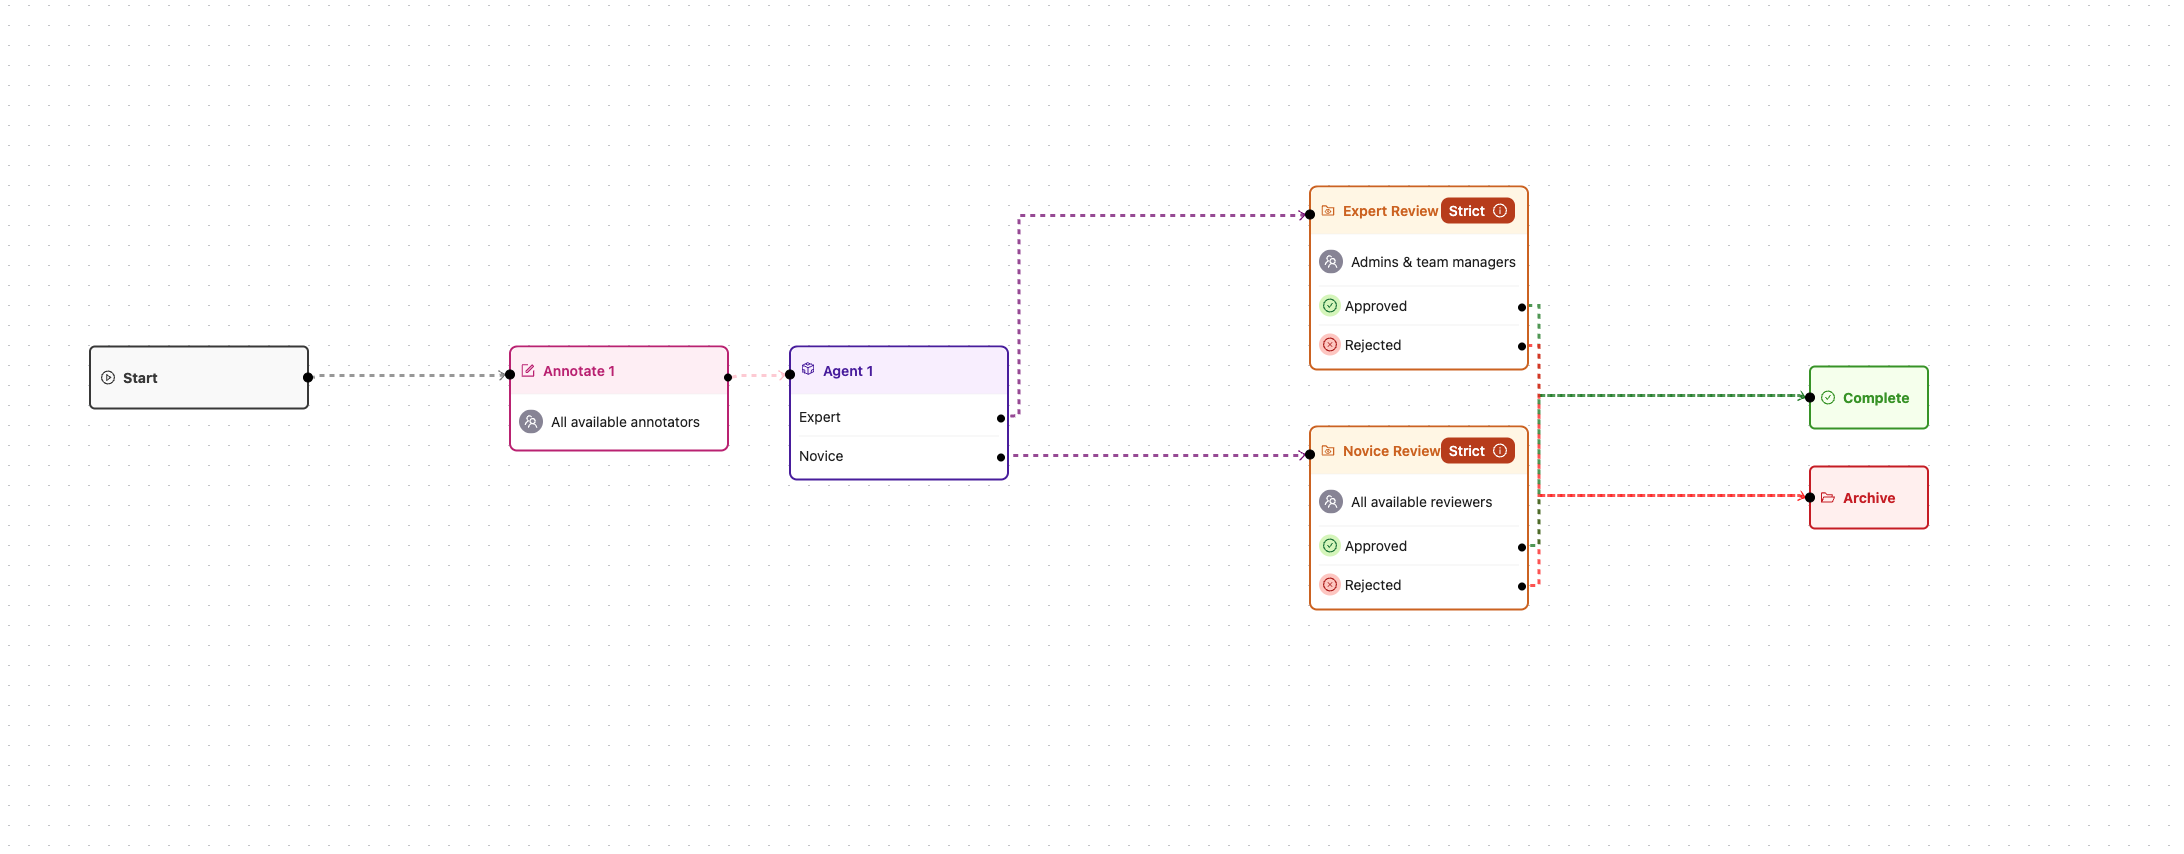

### Installation

Ensure that you have the `encord-agents` library installed.

In [ ]:
!python -m pip install encord-agents

## Encord Authentication

Encord uses ssh-keys for authentication. The following is a code cell for setting the `ENCORD_SSH_KEY` environment variable. It contains the raw content of your private ssh key file.

If you have not setup an ssh key, see our [documentation](https://agents-docs.encord.com/authentication/).

> 💡 In colab, you can set the key once in the secrets in the left sidebar and load it in new notebooks. IF YOU ARE NOT RUNNING THE CODE IN THE COLLAB NOTEBOOK, you must set the environment variable directly.
> ```python
> os.environ["ENCORD_SSH_KEY"] = """paste-private-key-here"""
> ```

In [ ]:
import os

os.environ["ENCORD_SSH_KEY"] = "private_key_file_content"
# or you can set a path to a file
# os.environ["ENCORD_SSH_KEY_FILE"] = "/path/to/your/private/key"

#### [Alternative] Temporary Key
There's also the option of generating a temporary (fresh) ssh key pair via the code cell below.
Please follow the instructions printed when executing the code.

In [ ]:
# ⚠️ Safe to skip if you have authenticated already
import os

from encord_agents.utils.colab import generate_public_private_key_pair_with_instructions

private_key_path, public_key_path = generate_public_private_key_pair_with_instructions()
os.environ["ENCORD_SSH_KEY_FILE"] = private_key_path.as_posix()

## Define the Agent

In the following code cell, we define the custom code that routes based on prior annotator name.

Ensure that you add:
- `<your_project_hash>`: You obtain it from the Project page in the Encord platform.
- `<your_agent_stage_uuid>`: Can be found from the workflow graph or the agent name can be used
- `<your_pathway_uuid>`: It will be listed when you expand the agent node of the Workflow on the Project page. (You can also use the pathway name that you gave it)

In [ ]:
from encord.workflow.stages.agent import AgentTask

from encord_agents.tasks import Runner

runner = Runner(project_hash="<your_project_hash>")


@runner.stage("<your_agent_stage_uuid>")
def by_file_name(task: AgentTask) -> str:
    last_annotated_by = task.last_annotated_by
    if "expert" in last_annotated_by:
        return "Expert"
    else:
        return "Novice"

- **Task Runner:** The code initializes a runner to process tasks.
- **Task Routing:** It defines a stage implementation that:
  - Extracts the last annotated by
  - Identifies whether expert is in the email i.e: john+expert@acme.org
  - Routes the task onto further review dependant whether it's an expert

## Running the Agent

The `runner` object is callable which means that you can just call it to route your tasks.

In [ ]:
# Run the Agent
# After 50 label updates, tasks are moved in the workflow.
# Set to refresh every 3600 seconds to continuously check for new tasks
runner(refresh_every=3600, task_batch_size=50, max_tasks_per_stage=None)

## Outcome

Your agent now routes tasks based on the previous annotator and routes them appropriately through the Workflow.

> 💡 To run this as a command-line interface, save the code in an `agents.py` file and replace:  
> ```python
> runner()
> ```  
> with:  
> ```python
> if __name__ == "__main__":
>     runner.run()
> ```  
> This lets you set parameters like the project hash from the command line:  
> ```bash
> python agent.py --project-hash "..."
> ```

